In [ ]:
Урок 22-2
Введение в машинное обучение.
Переобучение и недообучение

In [ ]:
Функция learning_curve
в Scikit-learn
Это инструмент для оценки
производительности модели машинного
обучения по мере увеличения размера
обучающего набора данных. 

In [ ]:
Шаг 1: Импорт необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing

In [ ]:
Шаг 2: Загрузка и подготовка набора данных

In [2]:
# Загрузите набор данных
data = fetch_california_housing()
X, y = data.data, data.target
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
Шаг 3: Определите функцию для построения кривых
обучения

In [3]:
def plot_learning_curves(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
 train_sizes, train_scores, validation_scores = learning_curve(
 estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
 )

 train_scores_mean = -train_scores.mean(axis=1)
 validation_scores_mean = -validation_scores.mean(axis=1)

 plt.figure(figsize=(12, 6))
 plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
 plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation error')
 plt.xlabel('Размер обучающих данных')
 plt.ylabel('Ошибка')
 plt.title('Кривые обучения')
 plt.legend(loc='best')
 plt.grid()
 plt.show()

In [ ]:
Шаг 4: Обучение модели и построение кривых
обучения

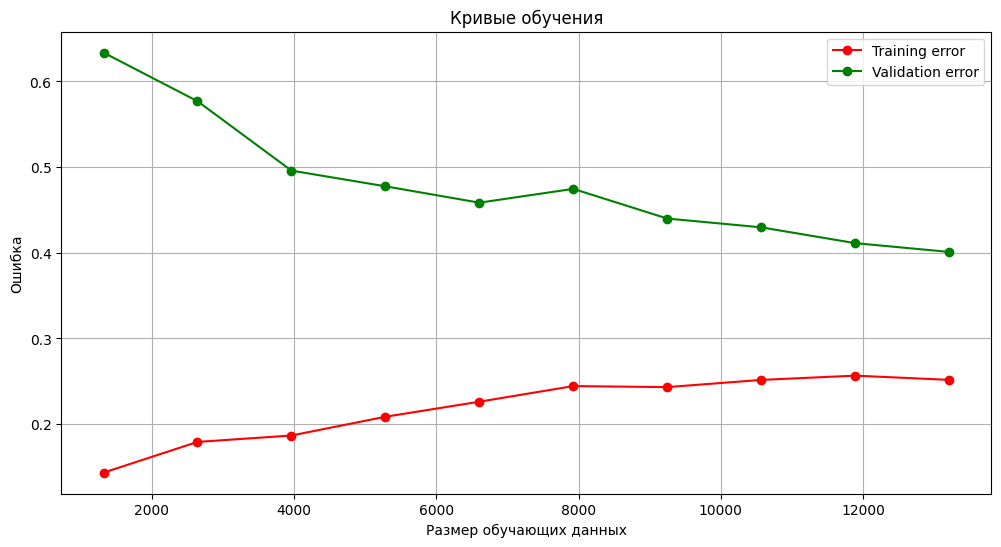

In [9]:
# Инициализируем модель дерева решений
model = DecisionTreeRegressor(max_depth=9, random_state=42)
# Построить кривые обучения
plot_learning_curves(model, X_train, y_train)

In [ ]:
Интерпретация кривых обучения

● Если кривые обучения показывают, что ошибка обучения постоянно уменьшается и приближается
к нулю, а ошибка проверки остается значительно выше и может даже увеличиться, это
свидетельствует о переобучении.
● Если кривые обучения показывают, что ошибки обучения и проверки высоки и остаются
относительно постоянными, это свидетельствует о недообучении.
● Хорошо подогнанная модель имеет кривые обучения, на которых ошибки обучения и проверки
уменьшаются и сходятся к одинаковому значению. 

In [ ]:
Кросс-валидация

Это техника, используемая для оценки
производительности модели машинного
обучения и диагностики таких проблем, как
переобучение и недообучение. Разбивая
данные на несколько подмножеств и обучая
модель на различных комбинациях этих
подмножеств, кросс-валидация позволяет
получить более полную оценку
эффективности модели.

In [ ]:
Шаг 1: Импорт необходимых библиотек

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

In [ ]:
Шаг 2: Загрузка и подготовка набора данных

In [11]:
# Загрузить набор данных
data = load_breast_cancer()
X, y = data.data, data.target
# Преобразуем в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [ ]:
Шаг 3: Выполните кросс-валидацию

In [12]:
# Инициализируем модель дерева решений
model = DecisionTreeClassifier(random_state=42)
# Выполняем 5-кратную перекрестную валидацию
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
# Выведите оценки кросс-валидации
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Средняя оценка кросс-валидации: {cv_scores.mean()}')

Cross-Validation Scores: [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
Средняя оценка кросс-валидации: 0.9173420276354604


In [ ]:
Шаг 4: Анализ результатов

In [13]:
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучите модель на обучающих данных
model.fit(X_train, y_train)
# Делаем предсказания на обучающем и тестовом наборах
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
# Рассчитайте точность на обучающем и тестовом наборах
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')

Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


In [ ]:
Регуляризация
Это техника, используемая в машинном
обучении для предотвращения чрезмерной
подгонки путем добавления штрафа к
сложности модели. Этот штраф не
позволяет модели подстраиваться под шум
в обучающих данных, тем самым улучшая ее
обобщение на новые, неизвестные данные.

In [ ]:
ȃеализация
регуляризации (L1, L2) на
основе данных

In [ ]:
Шаг 1: Импорт необходимых библиотек

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [ ]:
Шаг 2: Загрузка и подготовка набора данных

In [15]:
# Загрузка набора данных
data = fetch_california_housing()
X, y = data.data, data.target
# Преобразование в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

In [ ]:
Шаг 3: Разделение на обучение и тестирование

In [16]:
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

In [ ]:
Шаг 4: Стандартизация данных

In [17]:
# Инициализация стандартного скейлера
scaler = StandardScaler()
# Подгонка и преобразование обучающих данных
X_train_scaled = scaler.fit_transform(X_train)
# Преобразование тестовых данных
X_test_scaled = scaler.transform(X_test)

In [ ]:
Шаг 5: Обучение и оценка модели регрессии LASSO

In [18]:
# Инициализируем регрессионную модель LASSO с параметром регуляризации alpha
lasso = Lasso(alpha=0.1) # Lasso - это линейная регрессия, но со штрафными коэффициентами за переобучение
# Обучите модель на обучающих данных
lasso.fit(X_train_scaled, y_train)
# Делаем прогнозы на тестовых данных
y_pred_lasso = lasso.predict(X_test_scaled)
# Оценить модель
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f'Регрессия LASSO - средняя квадратичная ошибка: {mse_lasso}')
print(f'Регрессия LASSO - R-квадрат: {r2_lasso}')

Регрессия LASSO - средняя квадратичная ошибка: 0.6796290284328821
Регрессия LASSO - R-квадрат: 0.4813611325029077


In [ ]:
Шаг 6: Обучение и оценка модели гребневой
регрессии

In [19]:
# Инициализируем модель ридж-регрессии с параметром регуляризации alpha
ridge = Ridge(alpha=0.1)
# Обучить модель на обучающих данных
ridge.fit(X_train_scaled, y_train)
# Делаем прогнозы на тестовых данных
y_pred_ridge = ridge.predict(X_test_scaled)
# Оценить модель
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R-квадрат: {r2_ridge}')

Ridge Regression - Mean Squared Error: 0.555887913867418
Ridge Regression - R-квадрат: 0.5757905180002314


In [ ]:
Шаг 7: Сравнение результатов

In [20]:
# Сравниваем коэффициенты регрессии LASSO и гребневой регрессии
coefficients = pd.DataFrame({
 'Feature': data.feature_names,
 'Коэффициенты LASSO': lasso.coef_,
 'Ridge Coefficients': ridge.coef_
})
print(coefficients)

      Feature  Коэффициенты LASSO  Ridge Coefficients
0      MedInc            0.710598            0.854377
1    HouseAge            0.106453            0.122554
2    AveRooms           -0.000000           -0.294390
3   AveBedrms            0.000000            0.339234
4  Population           -0.000000           -0.002305
5    AveOccup           -0.000000           -0.040829
6    Latitude           -0.011469           -0.896853
7   Longitude           -0.000000           -0.869765


In [ ]:
# Инициализируем модель ридж-регрессии с параметром регуляризации alpha
model = LinearRegression()

# Обучить модель на обучающих данных
model.fit(X_train_scaled, y_train)

# Делаем прогнозы на тестовых данных
y_pred = model.predict(X_test_scaled)

# Оценить модель
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Linear Regression - Mean Squared Error: {mse}')
print(f'Linear Regression - R-квадрат: {r2}')

In [ ]:
Проведите k-кратную перекрестную валидацию с помощью набора данных Iris,
чтобы оценить эффективность модели машинного обучения. Для этой задачи мы
будем использовать классификатор Support Vector Machine (SVM).
Шаги по внедрению:
1. Импорт необходимых библиотек
2. Загрузите набор данных Iris
3. Определите модель
4. Выполните 5-кратную перекрестную валидацию
5. Оценить модель

In [21]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

svm_classifier = SVC(kernel='linear', random_state=42)
cross_val_results = cross_val_score(svm_classifier, X, y, cv=5)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean Accuracy: 0.9800000000000001


In [ ]:
from sklearn import datasets
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

iris = datasets.load_iris()
X, y = iris.data, iris.target

#svm_classifier = SVC(kernel='linear', random_state=42)
model = DecisionTreeClassifier(random_state=42)
#model = LinearRegression()

cross_val_results = cross_val_score(model, X, y, cv=5)

print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

In [ ]:
Практикум 22

In [ ]:
Задание 1: Реализуйте линейную регрессию для прогнозирования цен на жилье с
помощью набора данных California Housing. Оцените эффективность модели,
используя среднюю квадратичную ошибку (MSE) и R-квадрат (R²). Постройте график
остатков, чтобы проверить наличие каких-либо закономерностей.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Загрузка набора данных
data = fetch_california_housing()
X, y = data.data, data.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(mean_squared_error(y_test,y_pred))    # вычисляем для двух парметров как далеко лежат от прямой
print(r2_score(y_test,y_pred))

0.5558915986952425
0.5757877060324521


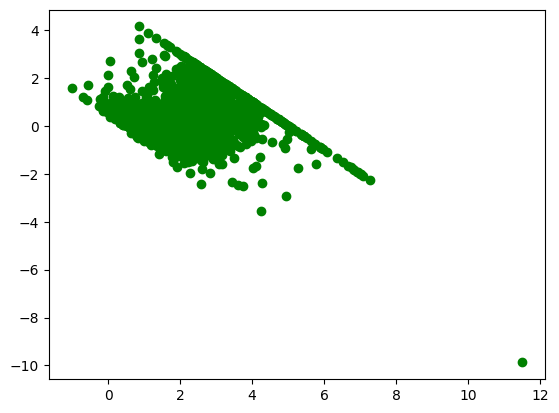

In [25]:
plt.scatter(y_pred, y_test-y_pred, color='green')

In [ ]:
Задание 2: Реализуйте логистическую регрессию для классификации
злокачественной или доброкачественной опухоли на наборе данных Breast Cancer.
Оцените модель с помощью показателей accuracy, precision, recall и F1-score.

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report, f1_score, accuracy_score

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=5000)
# Обучаем модель на обучающих данных
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1_score}')

Precision: 0.9459459459459459
Recall: 0.9859154929577465
Accuracy: 0.956140350877193
F1 score: 0.9655172413793104


In [ ]:
Задача 3: Реализуйте классификатор на основе дерева решений для предсказания
качества вина, используя набор данных Wine. Оцените модель с помощью
перекрестной валидации и постройте дерево решений.

Средняя точность на кросс-валидации: 0.8653968253968254


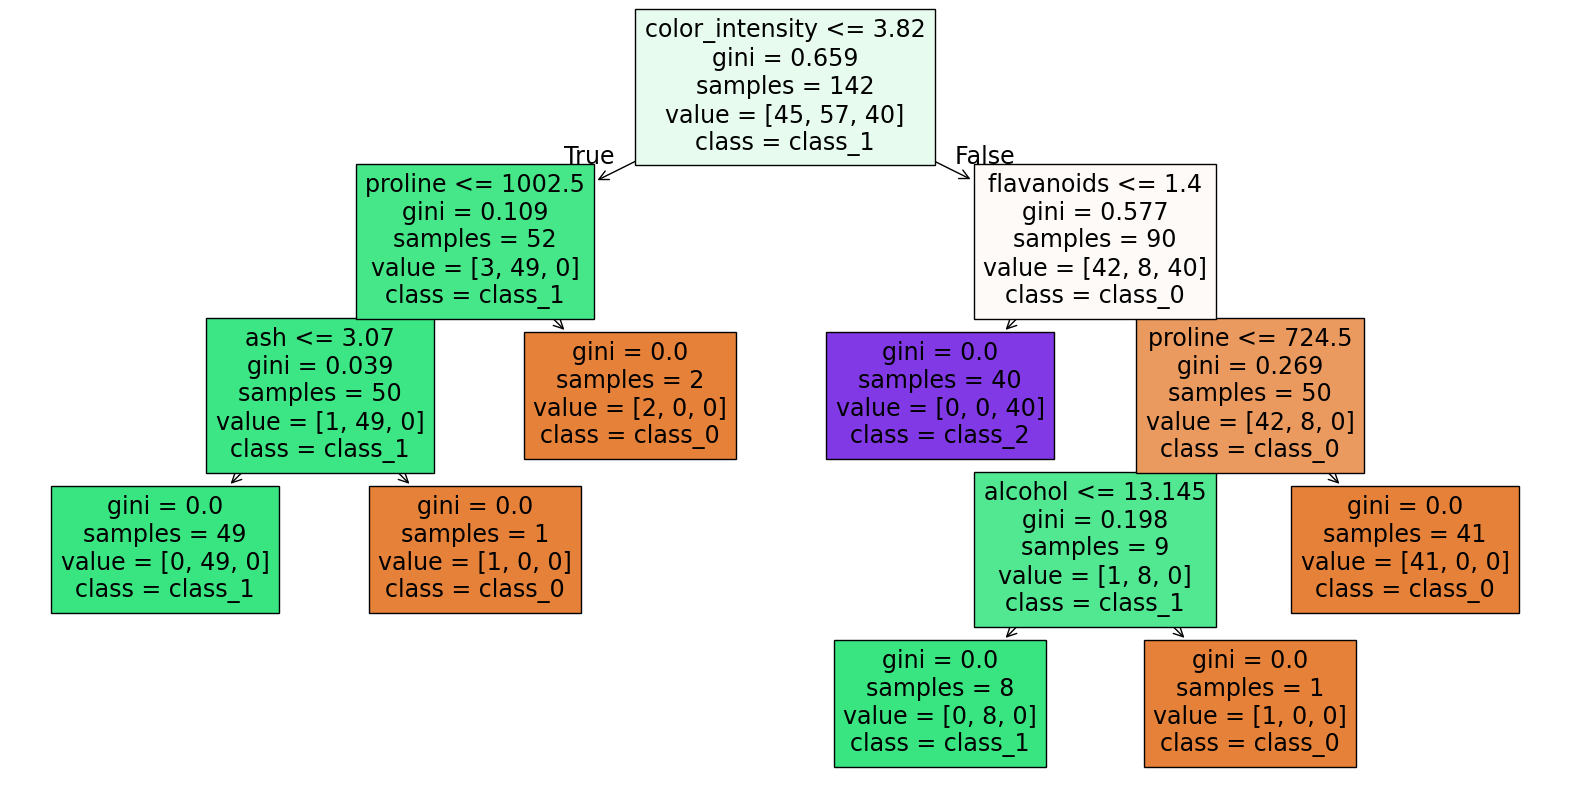

In [28]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Загрузка набора данных Wine
data = load_wine()
X = data.data  # Признаки
y = data.target  # (категории качества вина
#data
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Обучение модели дерева решений
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Оценка модели с перекрестной валидацией
cross_val_scores = cross_val_score(model, X, y, cv=5)
print(f"Средняя точность на кросс-валидации: {cross_val_scores.mean()}")
# Дерево решений
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.show()

In [ ]:
Задача 4: Реализуйте модель K-Nearest Neighbors (KNN) для классификации
рукописных цифр с помощью набора данных Digits. Оцените модель по точности и
постройте матрицу ошибок.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_digits

data = load_digits()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=3)

# Обучить модель на обучающих данных
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Confusion:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9833333333333333
Confusion:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 34  0  0  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 46  1  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  1  1  0  0  0 37]]


In [ ]:
Задача 5: Постройте кривые обучения для диагностики переобучения и
недообучения, используя набор данных Iris и модель Decision Tree. Постройте
кривые обучения для ошибок обучения и проверки.

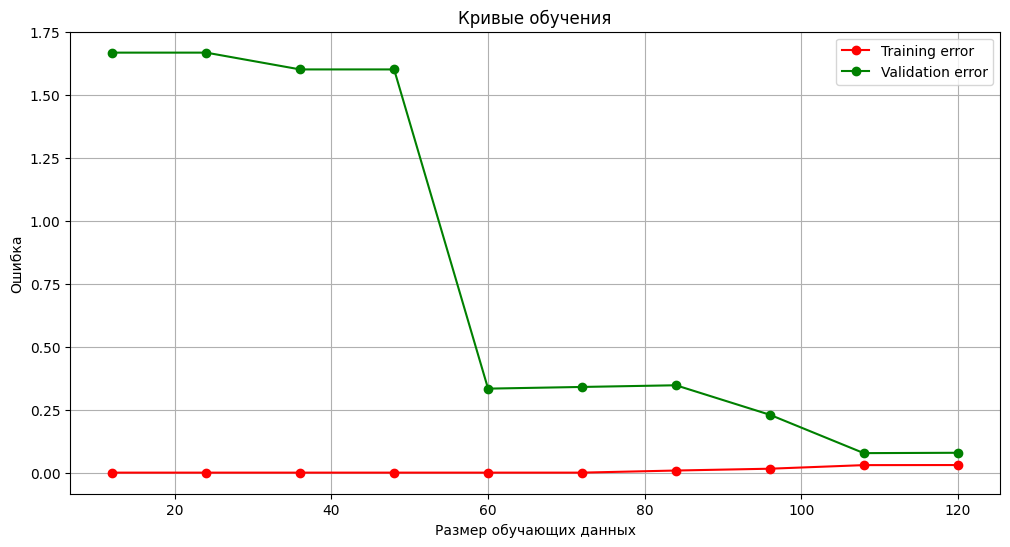

In [32]:
from sklearn.datasets import load_iris
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Загрузить набор данных
iris = load_iris()
X, y = iris.data, iris.target
def plot_learning_curves(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
 train_sizes, train_scores, validation_scores = learning_curve(
 estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
 )

 train_scores_mean = -train_scores.mean(axis=1)
 validation_scores_mean = -validation_scores.mean(axis=1)

 plt.figure(figsize=(12, 6))
 plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
 plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation error')
 plt.xlabel('Размер обучающих данных')
 plt.ylabel('Ошибка')
 plt.title('Кривые обучения')
 plt.legend(loc='best')
 plt.grid()
 plt.show()

# Инициализируем модель дерева решений
model = DecisionTreeRegressor(max_depth=2, random_state=42)

# Построить кривые обучения
plot_learning_curves(model, X, y)

In [ ]:
Задача 6: Реализуйте регрессию LASSO и ридж-регрессию, используя набор данных
Iris. Сравните эффективность обеих моделей, используя среднюю квадратичную
ошибку (MSE) и R-квадрат (R²). Постройте графики коэффициентов обеих моделей.

Регрессия LASSO - средняя квадратичная ошибка: 0.06677344873438022
Регрессия LASSO - R-квадрат: 0.9044577045136054
Регрессия ridge - средняя квадратичная ошибка: 0.03733155605720707
Регрессия ridge - R-квадрат: 0.9465844189960471
[ 0.         -0.          0.40782891  0.        ]
[-0.11709525 -0.05825264  0.25929034  0.53798793]


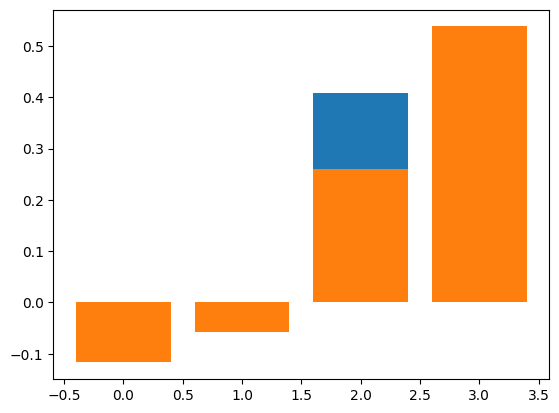

In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
data = load_iris()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Инициализируем регрессионную модель LASSO с параметром регуляризации alpha
lasso = Lasso(alpha=0.1)
ridge = Ridge(alpha=0.1)
# Обучите модель на обучающих данных
lasso.fit(X_train, y_train)
ridge.fit(X_train, y_train)
# Делаем прогнозы на тестовых данных
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
# Оценить модель
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f'Регрессия LASSO - средняя квадратичная ошибка: {mse_lasso}')
print(f'Регрессия LASSO - R-квадрат: {r2_lasso}')
print(f'Регрессия ridge - средняя квадратичная ошибка: {mse_ridge}')
print(f'Регрессия ridge - R-квадрат: {r2_ridge}')
plt.bar(range(4), lasso.coef_)
plt.bar(range(4), ridge.coef_)
print(lasso.coef_)
print(ridge.coef_)

In [ ]:
Задача 7: Обучите классификатор дерево решений на наборе данных Iris. Постройте
кривую Precision-Recall и обсудите компромисс между точностью и
чувствительностью. Для простоты преобразуйте многоклассовую задачу в задачу
бинарной классификации.

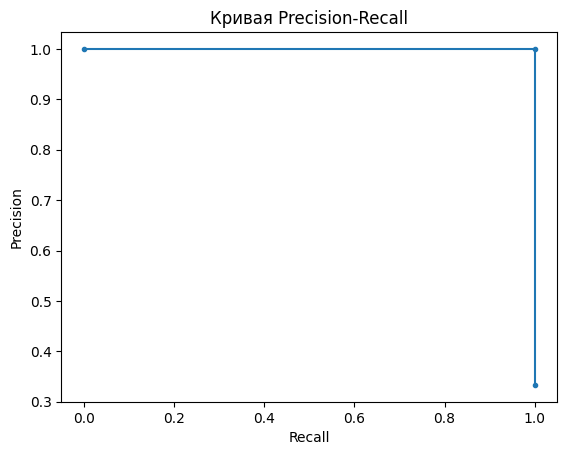

In [34]:
iris = load_iris()
X, y = iris.data, iris.target

y_new = (y == 0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.2, random_state=42)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# Рассчитайте кривую Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)
# Построить график кривой Precision-Recall
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.show()